In [ ]:
import os
import tempfile
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install category_encoders

In [ ]:
from category_encoders import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Model and performance evaluation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lbl = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Crossroads/engg_data/crossroads_full_feature_set.csv")

In [ ]:
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,PC1_group,class_name_grp,ticket_class_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,lastyear_minus_gameday,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Game Time,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Precipitation,Avg_Dew_Point,weekend_flag
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1


In [ ]:
df.isnull().sum()

acct_id                           0
acct_type_desc                91418
event_name                        0
event_date                        0
plan_event_name              279172
comp_name                     80644
section_name                      0
row_name                          0
SeatNum                           0
price_code                        0
PC1                               0
Price                             0
paid                         154145
add_datetime                  80644
class_name                        0
status                            0
Sales_Source                1280704
isHost                            0
SeatType                          0
TicketClass                       0
Start Year                  1146325
LastYear                    1146325
Term                        1146445
TicketType                        0
SeatUniqueID                      0
Season                            0
ClubExpYear                 1146325
Tenure                      

In [ ]:
df["isSTM"].unique()

array([nan,  1.])

In [ ]:
def combine_vals(row):
  if row["Resold"] in [1.0, '1', 'Yes']:
    return 1
  else:
    return 0

df["Resold"] = df.apply(lambda x: combine_vals(x), 1)

In [ ]:
df[["acct_type_desc"]] = df[["acct_type_desc"]].fillna("NA")
df[["acct_type_group"]] = df[["acct_type_group"]].fillna("NA")
df[["plan_event_name"]] = df[["plan_event_name"]].fillna("NA")
df[["plan_event_name_group"]] = df[["plan_event_name_group"]].fillna("NA")
df[["Sales_Source"]] = df[["Sales_Source"]].fillna("NA")
df[["Zone"]] = df[["Zone"]].fillna("NA")
df[["comp_name"]] = df[["comp_name"]].fillna("NA")
df[["comp_names_group"]] = df[["comp_names_group"]].fillna("NA")
df[["class_name_grp"]] = df[["class_name_grp"]].fillna("NA")
df[["paid"]] = df[["paid"]].fillna("NA")
df[["gameday_minus_start_year"]] = df[["gameday_minus_start_year"]].fillna(-1)
df[["lastyear_minus_gameday"]] = df[["lastyear_minus_gameday"]].fillna(-1000)
df[["unemployment_rate"]] = df[["unemployment_rate"]].fillna(-1)
df[["no_days_prebooked"]] = df[["no_days_prebooked"]].fillna(-1000)
df[["Term"]] = df[["Term"]].fillna(-1)
df[["Tenure"]] = df[["Tenure"]].fillna(-1)
df[["ResalePrice"]] = df[["ResalePrice"]].fillna(-1)
df[["isSTM"]] = df[["isSTM"]].fillna(0)
df["isSTM"] = df["isSTM"].astype(int)


In [ ]:
def pivot(train_data, group_cols, agg_col):
    data = train_data.groupby(group_cols).agg({agg_col: "count"}).reset_index()
    data = pd.pivot_table(data, values=agg_col, index=[group_cols[0]], columns=[group_cols[1]], aggfunc=np.sum).reset_index().rename_axis(None, axis=1)
    data = data.fillna(0)
    data["count"] = data["Yes"] + data["No"]
    data["%Attended"] = 100*data["Yes"]/(data["Yes"]+data["No"])
    return data

In [ ]:
accnt_type_df = pivot(df, ["acct_id", "isAttended"], "UniqueID")
accnt_type_df.head()

,acct_id,???,No,Yes,count,%Attended
0,190,6467.0,68700.0,369.0,69069.0,0.534248
1,14999990,0.0,8.0,0.0,8.0,0.000000
2,16999990,0.0,1.0,0.0,1.0,0.000000
3,110002390,14.0,29.0,97.0,126.0,76.984127
4,110003490,20.0,25.0,135.0,160.0,84.375000


In [ ]:
temp = df[df["isAttended"]!="???"]
acct_count_df = temp.groupby("acct_id").agg({"event_name": "nunique"}).reset_index()
acct_count_df = acct_count_df.rename(columns={"event_name": "event_name_count"})
acct_count_df.head()

,acct_id,event_name_count
0,190,18
1,14999990,2
2,16999990,1
3,110002390,18
4,110003490,16


In [ ]:
df = df.merge(accnt_type_df[["acct_id", "count", "%Attended"]], on="acct_id", how="left")
df = df.merge(acct_count_df[["acct_id", "event_name_count"]], on="acct_id", how="left")

In [ ]:
df["%Attended"] = df["%Attended"].fillna(-1)
df["event_name_count"] = df["event_name_count"].fillna(-1)

In [ ]:
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,PC1_group,class_name_grp,ticket_class_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,lastyear_minus_gameday,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Game Time,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Precipitation,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,54.0,94.444444,18.0
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,72.0,70.833333,18.0
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,72.0,70.833333,18.0
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,18.0,83.333333,18.0
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,144.0,72.222222,18.0


In [ ]:
df.isnull().sum()["%Attended"]

0

In [ ]:
t0 = df[(df["isAttended"]=="???") & (df["%Attended"]<21) & (df["count"]>=10) & (df["event_name_count"]>2)]
t0.shape, t0.acct_id.nunique()

((7128, 69), 96)

In [ ]:
t = df[df["isAttended"]=="???"]
t.shape, t.acct_id.nunique()

((128688, 69), 22102)

In [ ]:
100.0*7128/128688

5.538977993286087

In [ ]:
att  = df["isAttended"].values
df = df.drop("isAttended", 1)
df["isAttended"] = att

In [ ]:
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,PC1_group,class_name_grp,ticket_class_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,lastyear_minus_gameday,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Game Time,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Precipitation,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count,isAttended
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,54.0,94.444444,18.0,Yes
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,72.0,70.833333,18.0,No
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,72.0,70.833333,18.0,No
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,18.0,83.333333,18.0,Yes
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,144.0,72.222222,18.0,No


In [ ]:
df = df.drop(["acct_id", "event_date", "section_name", "row_name", "SeatNum", "Game Time", 
              "add_datetime", "Start Year", "LastYear", "SeatUniqueID", "ResaleDate", 
              "ClubExpYear"], 1)


In [ ]:
df["Season"] = df["Season"].astype(str)

In [ ]:
def label_encode(row, col):
  if row[col]=="Yes":
    return 1
  elif row[col]=="No":
    return 0
  else:
    return row[col]

df["isAttended"] = df.apply(lambda x: label_encode(x, "isAttended"), 1)

In [ ]:
df.shape

(1286916, 57)

In [ ]:
df = df.drop(["PC1_group", "lastyear_minus_gameday", "SeatType", "status", "Precipitation", "ticket_class_grp"], 1)

In [ ]:
cat_cols = []
for k,v in dict(df.dtypes).items():
  if v=="object":
    cat_cols.append(k)

cat_cols = list(set(cat_cols) - set(["event_name", "UniqueID", "isAttended"]))

from pandas.core.indexes import category
for col in cat_cols:
  df[col] = df[col].astype("category")

In [ ]:
# cat_cols

In [ ]:
df.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count,isAttended
0,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,25.0,CLT21HOU-101-10-1,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,54.0,94.444444,18.0,1
1,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,20.0,CLT21HOU-101-10-10,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,72.0,70.833333,18.0,0
2,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,20.0,CLT21HOU-101-10-11,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,72.0,70.833333,18.0,0
3,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,4.0,CLT21HOU-101-10-12,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,18.0,83.333333,18.0,1
4,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-13,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,0


In [ ]:
train_df = df[df["isAttended"]!="???"]
test_df = df[df["isAttended"]=="???"]

In [ ]:
val_data = pd.read_csv("/content/drive/MyDrive/Crossroads/Ensemble_Model/Ensemble_Validation_DataSet_v1")
val_data = val_data.drop("Unnamed: 0", 1)
val_df = train_df[train_df["UniqueID"].isin(val_data["UniqueID"].values.tolist())]

In [ ]:
val_df.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count,isAttended
4,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-13,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,0
5,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-14,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,1
8,Employee,CLT21HOU,21FS,Front Office/Club Staff,FR,F,0.0,Y,OPEN,NA,0,Manifest,-1.0,Comp,2021,7.0,CLT21HOU-101-10-17,0,-1.0,0,G2,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_1,179.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,43.0,95.348837,18.0,1
17,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,38.0,CLT21HOU-101-10-5,1,72.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,204.0,93.627451,18.0,1
18,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,30.0,CLT21HOU-101-10-6,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,54.0,79.629630,18.0,1


In [ ]:
train_df = train_df[~train_df["UniqueID"].isin(val_df["UniqueID"].values.tolist())]

In [ ]:
train_df.shape, val_df.shape

((926582, 51), (231646, 51))

In [ ]:
val_df.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count,isAttended
4,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-13,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,0
5,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-14,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,1
8,Employee,CLT21HOU,21FS,Front Office/Club Staff,FR,F,0.0,Y,OPEN,NA,0,Manifest,-1.0,Comp,2021,7.0,CLT21HOU-101-10-17,0,-1.0,0,G2,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_1,179.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,43.0,95.348837,18.0,1
17,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,38.0,CLT21HOU-101-10-5,1,72.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,204.0,93.627451,18.0,1
18,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,30.0,CLT21HOU-101-10-6,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,54.0,79.629630,18.0,1


In [ ]:
train_cnt = train_df["count"].values
train_att = train_df["%Attended"].values
train_event_cnt = train_df["event_name_count"].values

val_cnt = val_df["count"].values
val_att = val_df["%Attended"].values
val_event_cnt = val_df["event_name_count"].values

test_cnt = test_df["count"].values
test_att = test_df["%Attended"].values
test_event_cnt = test_df["event_name_count"].values

In [ ]:
train_df = train_df.drop(["count", "%Attended", "event_name_count"], 1)
val_df = val_df.drop(["count", "%Attended", "event_name_count"], 1)
test_df = test_df.drop(["count", "%Attended", "event_name_count"], 1)

In [ ]:
train_df.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag,isAttended
0,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,25.0,CLT21HOU-101-10-1,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,1
1,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,20.0,CLT21HOU-101-10-10,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,0
2,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,20.0,CLT21HOU-101-10-11,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,0
3,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,4.0,CLT21HOU-101-10-12,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,1
6,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-15,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,0


In [ ]:
test_df["isAttended"].unique()

array(['???'], dtype=object)

In [ ]:
train_df.shape, val_df.shape, test_df.shape

((926582, 48), (231646, 48), (128688, 48))

In [ ]:
train_df["event_name"].nunique(), val_df["event_name"].nunique(), test_df["event_name"].nunique()

(18, 18, 2)

In [ ]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1].values
X_val = val_df.iloc[:, :-1]
y_val = val_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1].values

In [ ]:
enc = TargetEncoder(cols=cat_cols, min_samples_leaf=20, smoothing=10).fit(X_train, y_train)
X_train_encoded = enc.transform(X_train)
X_val_encoded = enc.transform(X_val)
X_test_encoded = enc.transform(X_test)

In [ ]:
X_train_encoded.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag
0,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,25.0,CLT21HOU-101-10-1,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
1,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,20.0,CLT21HOU-101-10-10,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
2,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,20.0,CLT21HOU-101-10-11,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
3,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,4.0,CLT21HOU-101-10-12,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
6,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,32.0,CLT21HOU-101-10-15,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1


In [ ]:
train_ids = X_train["UniqueID"].values
val_ids = X_val["UniqueID"].values
test_ids = X_test["UniqueID"].values

X_train = X_train.drop(["UniqueID", "event_name"], 1)
X_val = X_val.drop(["UniqueID", "event_name"], 1)
X_test = X_test.drop(["UniqueID", "event_name"], 1)

In [ ]:
train_ids = X_train_encoded["UniqueID"].values
val_ids = X_val_encoded["UniqueID"].values
test_ids = X_test_encoded["UniqueID"].values

X_train_encoded = X_train_encoded.drop(["UniqueID", "event_name"], 1)
X_val_encoded = X_val_encoded.drop(["UniqueID", "event_name"], 1)
X_test_encoded = X_test_encoded.drop(["UniqueID", "event_name"], 1)

In [ ]:
X_train_encoded.head()

,acct_type_desc,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag
0,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,25.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
1,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,20.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
2,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,20.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
3,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,4.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
6,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,32.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1


In [ ]:
scaler = StandardScaler()

X_train_scaled_encoded = scaler.fit_transform(X_train_encoded)

X_val_scaled_encoded = scaler.transform(X_val_encoded)
X_test_scaled_encoded = scaler.transform(X_test_encoded)

X_train_scaled_encoded = np.clip(X_train_scaled_encoded, -5, 5)
X_val_scaled_encoded = np.clip(X_val_scaled_encoded, -5, 5)
X_test_scaled_encoded = np.clip(X_test_scaled_encoded, -5, 5)


print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Test labels shape:', y_test.shape)

print('Training features shape:', X_train_scaled_encoded.shape)
print('Validation features shape:', X_val_scaled_encoded.shape)
print('Test features shape:', X_test_scaled_encoded.shape)

Training labels shape: (926582,)
Validation labels shape: (231646,)
Test labels shape: (128688,)
Training features shape: (926582, 45)
Validation features shape: (231646, 45)
Test features shape: (128688, 45)


In [ ]:
pca = PCA(n_components=4)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled_encoded))
X_val_pca = pd.DataFrame(pca.fit_transform(X_val_scaled_encoded))
X_test_pca = pd.DataFrame(pca.fit_transform(X_test_scaled_encoded))

In [ ]:
X_train_pca.head()

,0,1,2,3
0,-1.222922,-1.751193,0.423471,-1.794124
1,-1.176841,-1.739108,0.347282,-1.758097
2,-1.176841,-1.739108,0.347282,-1.758097
3,-1.029381,-1.700435,0.103480,-1.642810
4,-1.287435,-1.768112,0.530134,-1.844563


Text(0, 0.5, 'Explained Variance')

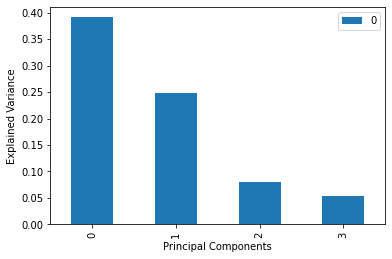

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")

In [ ]:
df["isAttended"].value_counts()

1      900945
0      257283
???    128688
Name: isAttended, dtype: int64

In [ ]:
257283/900945, 900945/257283

(0.28557015134109187, 3.5017665372372058)

In [ ]:
# Define the search space
param_grid = { 
    "max_depth": [2,4,6,8,10],
    "n_estimators": [100,200,300,400,500,600],
    "min_child_weight": [2],
    # # Percentage of columns to be randomly samples for each tree.
    # "colsample_bytree": [0.1,0.2,0.3,0.4,0.5,0.6],
    # # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    # "reg_alpha": [0, 0.5, 1, 5],
    # # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    # "reg_lambda": [0, 0.5, 1, 5],
    # "scale_pos_weight": [1, 0.286, 3.502]
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
# Initiate XGBoost Classifier
xgboost = XGBClassifier(tree_method='gpu_hist', objective='binary:logistic', max_depth=6, n_estimators=500, 
                        min_child_weight=1, reg_alpha=0, reg_lambda=5, learning_rate=0.2,
                        enable_categorical=True)
# Print default setting
xgboost.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 500,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 5,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'tree_method': 'gpu_hist',
 'enable_categorical': True}

In [ ]:
xgboost.fit(X_train_pca, [int(each) for each in y_train.tolist()], 
            eval_set=[(X_train_pca, y_train), (X_val_pca, y_val)], 
            verbose=2, early_stopping_rounds=30)

[0]	validation_0-error:0.152308	validation_1-error:0.153191
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[2]	validation_0-error:0.152236	validation_1-error:0.153091
[4]	validation_0-error:0.15222	validation_1-error:0.1531
[6]	validation_0-error:0.151907	validation_1-error:0.152893
[8]	validation_0-error:0.151873	validation_1-error:0.15275
[10]	validation_0-error:0.151448	validation_1-error:0.152526
[12]	validation_0-error:0.151299	validation_1-error:0.152388
[14]	validation_0-error:0.150846	validation_1-error:0.152224
[16]	validation_0-error:0.151085	validation_1-error:0.152616
[18]	validation_0-error:0.150435	validation_1-error:0.152012
[20]	validation_0-error:0.150298	validation_1-error:0.151909
[22]	validation_0-error:0.149988	validation_1-error:0.151762
[24]	validation_0-error:0.149912	validation_1-error:0.151783
[26]	validation_0-error:0.149993	validation_1-error:0.1

XGBClassifier(enable_categorical=True, learning_rate=0.2, max_depth=6,
              n_estimators=500, reg_lambda=5, tree_method='gpu_hist')

In [ ]:
import gc
gc.collect()

33

In [ ]:
y_pred_val_logit = [each[1] for each in xgboost.predict_proba(X_val_pca)]

In [ ]:
y_pred_val = [1 if each>0.5 else 0 for each in y_pred_val_logit]

In [ ]:
print(classification_report([int(each) for each in y_val.tolist()], y_pred_val))

              precision    recall  f1-score   support

           0       0.91      0.37      0.52     51457
           1       0.85      0.99      0.91    180189

    accuracy                           0.85    231646
   macro avg       0.88      0.68      0.72    231646
weighted avg       0.86      0.85      0.83    231646



In [ ]:
print(classification_report([int(each) for each in y_val.tolist()], y_pred_val))

              precision    recall  f1-score   support

           0       0.91      0.37      0.52     51457
           1       0.85      0.99      0.91    180189

    accuracy                           0.85    231646
   macro avg       0.88      0.68      0.72    231646
weighted avg       0.86      0.85      0.83    231646



In [ ]:
y_pred_test_logit = [each[1] for each in xgboost.predict_proba(X_test_pca)]

In [ ]:
y_pred_test = [1 if each>0.5 else 0 for each in y_pred_test_logit]

In [ ]:
val_sub_df = pd.DataFrame()
val_sub_df["UniqueID"] = val_ids
val_sub_df["XGB_pca_model_preds"] = y_pred_val_logit

In [ ]:
val_sub_df.head()

,UniqueID,XGB_pca_model_preds
0,CLT21HOU-101-10-13,0.861584
1,CLT21HOU-101-10-14,0.861584
2,CLT21HOU-101-10-17,0.792271
3,CLT21HOU-101-10-5,0.882463
4,CLT21HOU-101-10-6,0.862681


In [ ]:
test_sub_df = pd.DataFrame()
test_sub_df["UniqueID"] = test_ids
test_sub_df["XGB_pca_model_preds"] = y_pred_test_logit

In [ ]:
test_sub_df.head()

,UniqueID,XGB_pca_model_preds
0,CLT21LV-101-10-1,0.764142
1,CLT21LV-101-10-10,0.787877
2,CLT21LV-101-10-11,0.787877
3,CLT21LV-101-10-12,0.760550
4,CLT21LV-101-10-13,0.797273


In [ ]:
test_sub_df["XGB_pca_model_preds"].describe()

count    128688.000000
mean          0.858234
std           0.129309
min           0.251703
25%           0.773601
50%           0.913764
75%           0.963869
max           0.985597
Name: XGB_pca_model_preds, dtype: float64

In [ ]:
val_sub_df.to_csv("/content/drive/MyDrive/Crossroads/Ensemble_Model/saved_preds/Ayan_XGB_PCA_TE_val_preds.csv", index=False)


In [ ]:
test_sub_df.to_csv("/content/drive/MyDrive/Crossroads/Ensemble_Model/saved_preds/Ayan_XGB_PCA_TE_test_preds.csv", index=False)
